roses: 641 Images
Found 2935 images belonging to 5 classes.
daisy: 633 Images
Found 2935 images belonging to 5 classes.
dandelion: 898 Images
Found 2935 images belonging to 5 classes.
sunflowers: 699 Images
Found 2935 images belonging to 5 classes.
tulips: 799 Images
Found 2935 images belonging to 5 classes.


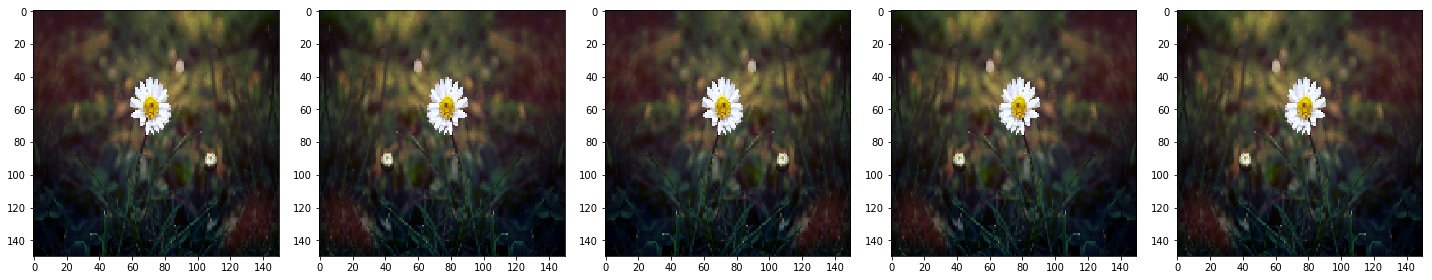

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)
base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
      shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
      shutil.move(v, os.path.join(base_dir, 'val', cl))
  
  train_dir = os.path.join(base_dir, 'train')
  val_dir = os.path.join(base_dir, 'val')

  batch_size = 100
  IMG_SHAPE =150

  image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

  train_data_gen = image_gen.flow_from_directory(
      batch_size=batch_size,
      directory=train_dir,
      shuffle=True,
      target_size=(IMG_SHAPE, IMG_SHAPE)
  )

  def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
      ax.imshow(img)
    plt.tight_layout()
    plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


Found 2935 images belonging to 5 classes.


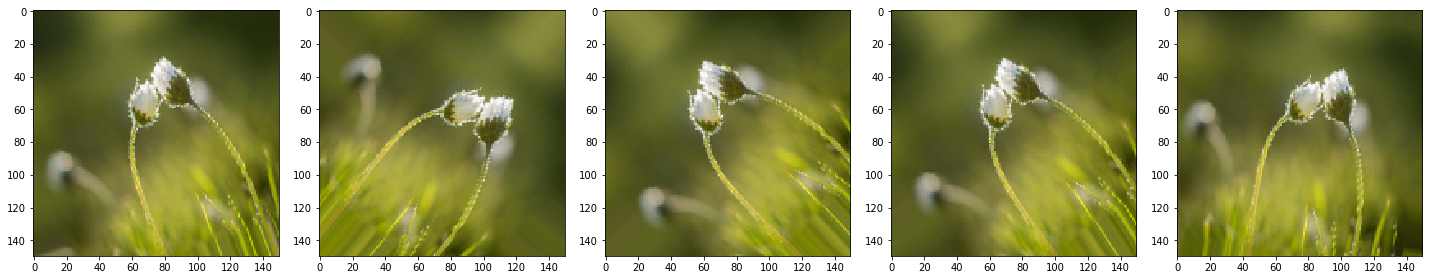

In [2]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SHAPE,IMG_SHAPE)
)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2935 images belonging to 5 classes.


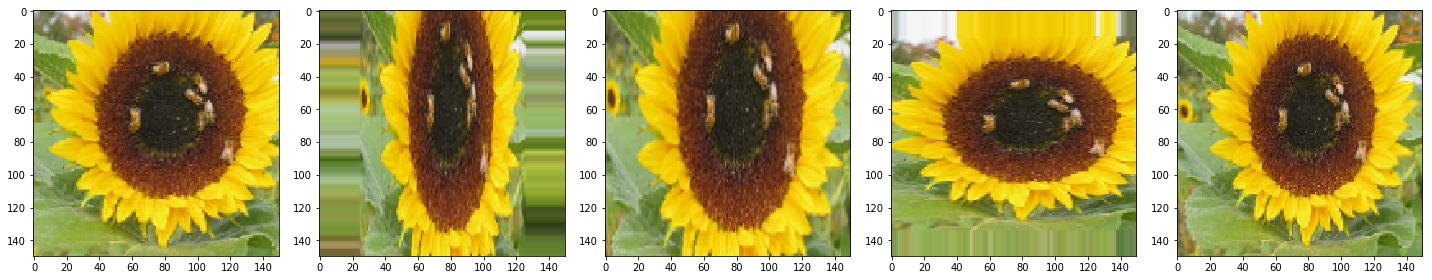

In [3]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SHAPE,IMG_SHAPE)
)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2935 images belonging to 5 classes.


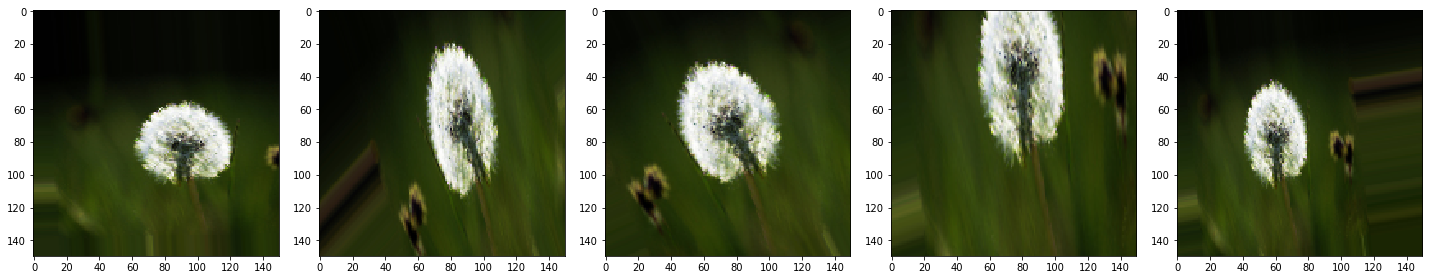

In [4]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.5
)

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SHAPE,IMG_SHAPE),
    class_mode='sparse'
)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [5]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(
    batch_size=batch_size,
    directory=val_dir,
    target_size=(IMG_SHAPE,IMG_SHAPE),
    class_mode='sparse'
)

Found 735 images belonging to 5 classes.


In [6]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 80
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Epoch 1/80
30/30 [==============================] - 24s 813ms/step - loss: 1.5358 - acc: 0.3540 - val_loss: 1.2199 - val_acc: 0.5048
Epoch 2/80
30/30 [==============================] - 24s 796ms/step - loss: 1.1926 - acc: 0.5022 - val_loss: 1.0622 - val_acc: 0.5769
Epoch 3/80
30/30 [==============================] - 24s 804ms/step - loss: 1.0865 - acc: 0.5632 - val_loss: 0.9984 - val_acc: 0.6082
Epoch 4/80
30/30 [==============================] - 25s 837ms/step - loss: 1.0227 - acc: 0.5959 - val_loss: 1.0229 - val_acc: 0.6095
Epoch 5/80
30/30 [==============================] - 26s 852ms/step - loss: 0.9795 - acc: 0.6153 - val_loss: 0.9074 - val_acc: 0.6354
Epoch 6/80
30/30 [==============================] - 26s 855ms/step - loss: 0.9450 - acc: 0.6341 - val_loss: 0.8605 - val_acc: 0.6476
Epoch 7/80
30/30 [==============================] - 25s 842ms/step - loss: 0.9134 - acc: 0.6504 - val_loss: 0.8827 - val_acc: 0.6299
Epoch 8/80
30/30 [==============================] - 25s 839ms/step - 

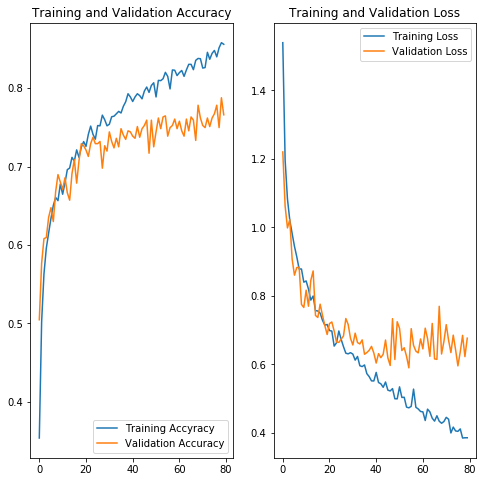

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accyracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()